In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
# to make results clear, we can display the results after only 3 digits after the dots  
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
data = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.000,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.000,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.000,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.000,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.000,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.000,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.000,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.500,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.000,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.400,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.000,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.600,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.000,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.600,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.000,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.600,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.300,Whittlesea City Council


In [4]:
data.describe(include = "all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
count,63023,63023,63023.000,63023,48433.000,63023,63023,63023,63023.000,63023,63023.000,63023.000,63023
unique,380,57754,NaN,3,NaN,9,476,112,NaN,8,NaN,NaN,34
top,Reservoir,5 Charles St,NaN,h,NaN,S,Barry,24/03/2018,NaN,Southern Metropolitan,NaN,NaN,Boroondara City Council
freq,1241,7,NaN,45053,NaN,34063,6894,1144,NaN,17559,NaN,NaN,5132
mean,NaN,NaN,3.111,NaN,997898.241,NaN,NaN,NaN,3125.674,NaN,7617.728,12.685,NaN
std,NaN,NaN,0.958,NaN,593498.919,NaN,NaN,NaN,125.627,NaN,4424.423,7.592,NaN
min,NaN,NaN,1.000,NaN,85000.000,NaN,NaN,NaN,3000.000,NaN,39.000,0.000,NaN
25%,NaN,NaN,3.000,NaN,620000.000,NaN,NaN,NaN,3056.000,NaN,4380.000,7.000,NaN
50%,NaN,NaN,3.000,NaN,830000.000,NaN,NaN,NaN,3107.000,NaN,6795.000,11.400,NaN
75%,NaN,NaN,4.000,NaN,1220000.000,NaN,NaN,NaN,3163.000,NaN,10412.000,16.700,NaN


In [5]:
data_af_drop = data.drop(["Address", "Date"], axis = 1)
data_af_drop

,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,3,h,1490000.000,S,Jellis,3067,Northern Metropolitan,4019,3.000,Yarra City Council
1,Abbotsford,3,h,1220000.000,S,Marshall,3067,Northern Metropolitan,4019,3.000,Yarra City Council
2,Abbotsford,3,h,1420000.000,S,Nelson,3067,Northern Metropolitan,4019,3.000,Yarra City Council
3,Aberfeldie,3,h,1515000.000,S,Barry,3040,Western Metropolitan,1543,7.500,Moonee Valley City Council
4,Airport West,2,h,670000.000,S,Nelson,3042,Western Metropolitan,3464,10.400,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3,h,566000.000,S,Raine,3064,Northern Metropolitan,5833,20.600,Hume City Council
63019,Roxburgh Park,3,h,500000.000,S,Raine,3064,Northern Metropolitan,5833,20.600,Hume City Council
63020,Roxburgh Park,3,h,545000.000,S,Raine,3064,Northern Metropolitan,5833,20.600,Hume City Council
63021,Thomastown,3,u,NaN,PI,Barry,3074,Northern Metropolitan,7955,15.300,Whittlesea City Council


In [6]:
data_af_drop.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [7]:
# hence only price has missing value which is more than 23% but 
# price is our primary variable so to solve data integrity we delete
# missing values 
data_af_MV = data_af_drop.dropna(axis = 0)
print(data_af_MV.isnull().sum())
data_af_MV.describe(include = "all")

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
count,48433,48433.000,48433,48433.000,48433,48433,48433.000,48433,48433.000,48433.000,48433
unique,370,NaN,3,NaN,5,422,NaN,8,NaN,NaN,34
top,Reservoir,NaN,h,NaN,S,Barry,NaN,Northern Metropolitan,NaN,NaN,Darebin City Council
freq,1067,NaN,34161,NaN,30624,4818,NaN,13598,NaN,NaN,3462
mean,NaN,3.072,NaN,997898.241,NaN,NaN,3123.210,NaN,7566.400,12.703,NaN
std,NaN,0.945,NaN,593498.919,NaN,NaN,125.535,NaN,4457.406,7.550,NaN
min,NaN,1.000,NaN,85000.000,NaN,NaN,3000.000,NaN,39.000,0.000,NaN
25%,NaN,2.000,NaN,620000.000,NaN,NaN,3051.000,NaN,4280.000,7.000,NaN
50%,NaN,3.000,NaN,830000.000,NaN,NaN,3103.000,NaN,6567.000,11.700,NaN
75%,NaN,4.000,NaN,1220000.000,NaN,NaN,3163.000,NaN,10412.000,16.700,NaN


<Axes: xlabel='Price', ylabel='Density'>

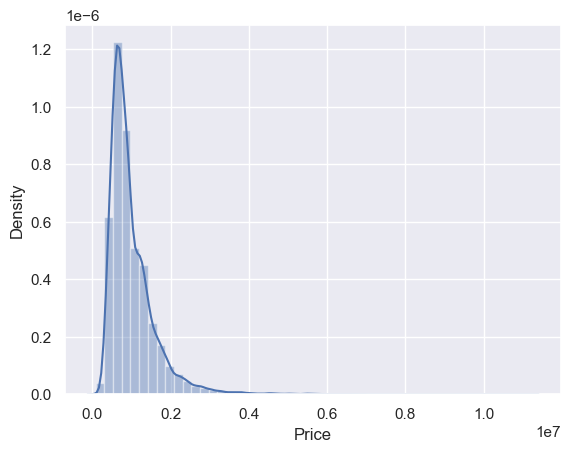

In [8]:
# to check variable distribution using distplot
sns.distplot(data_af_MV["Price"])

In [9]:
# hence we can see that above data is correctly distributed but 
# some data are out of range or not valid 
# if these type of situation are arrise and outliers are present 
# then we can delete 0.5% or 1% data or we can manuplate the data according our knowledge

In [10]:
# price outliers are present in right side so we can delete 1% from right
q = data_af_MV["Price"].quantile(0.99)
data_1 = data_af_MV[data_af_MV["Price"]<q]
data_1.describe(include = "all")

,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
count,47940,47940.000,47940,47940.000,47940,47940,47940.000,47940,47940.000,47940.000,47940
unique,370,NaN,3,NaN,5,421,NaN,8,NaN,NaN,34
top,Reservoir,NaN,h,NaN,S,Barry,NaN,Northern Metropolitan,NaN,NaN,Darebin City Council
freq,1067,NaN,33678,NaN,30354,4816,NaN,13563,NaN,NaN,3460
mean,NaN,3.059,NaN,966064.552,NaN,NaN,3123.094,NaN,7567.955,12.760,NaN
std,NaN,0.934,NaN,497331.630,NaN,NaN,126.103,NaN,4468.498,7.559,NaN
min,NaN,1.000,NaN,85000.000,NaN,NaN,3000.000,NaN,39.000,0.000,NaN
25%,NaN,2.000,NaN,617000.000,NaN,NaN,3051.000,NaN,4280.000,7.000,NaN
50%,NaN,3.000,NaN,825000.000,NaN,NaN,3102.000,NaN,6567.000,11.700,NaN
75%,NaN,4.000,NaN,1200000.000,NaN,NaN,3163.000,NaN,10412.000,16.700,NaN


<Axes: xlabel='Price', ylabel='Density'>

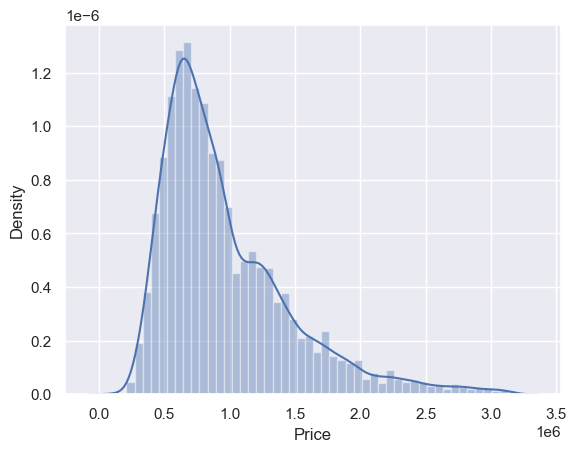

In [11]:
sns.distplot(data_1["Price"])

<Axes: xlabel='Rooms', ylabel='Density'>

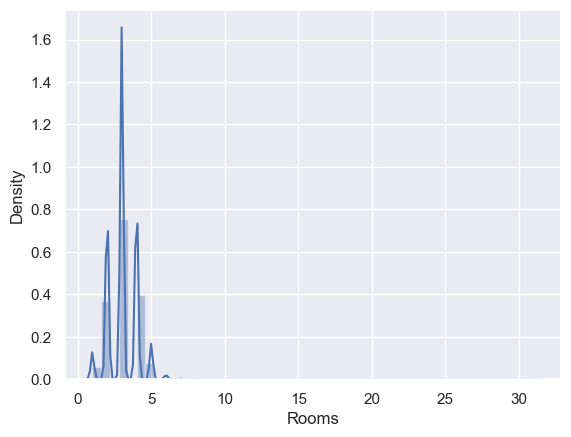

In [12]:
# check for rooms
sns.distplot(data_1["Rooms"])

In [13]:
# hence we can see that same price, room outliers are present in right side
q = data_1["Rooms"].quantile(0.995)
data_2 = data_1[data_1["Rooms"]<q]
data_2.describe(include = "all")

,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
count,47616,47616.000,47616,47616.000,47616,47616,47616.000,47616,47616.000,47616.000,47616
unique,370,NaN,3,NaN,5,419,NaN,8,NaN,NaN,34
top,Reservoir,NaN,h,NaN,S,Barry,NaN,Northern Metropolitan,NaN,NaN,Darebin City Council
freq,1067,NaN,33356,NaN,30181,4779,NaN,13515,NaN,NaN,3454
mean,NaN,3.036,NaN,962729.298,NaN,NaN,3123.079,NaN,7570.232,12.746,NaN
std,NaN,0.886,NaN,494628.753,NaN,NaN,126.142,NaN,4472.748,7.558,NaN
min,NaN,1.000,NaN,85000.000,NaN,NaN,3000.000,NaN,39.000,0.000,NaN
25%,NaN,2.000,NaN,615000.000,NaN,NaN,3051.000,NaN,4258.000,7.000,NaN
50%,NaN,3.000,NaN,825000.000,NaN,NaN,3102.000,NaN,6567.000,11.700,NaN
75%,NaN,4.000,NaN,1200000.000,NaN,NaN,3163.000,NaN,10412.000,16.700,NaN


<Axes: xlabel='Rooms', ylabel='Density'>

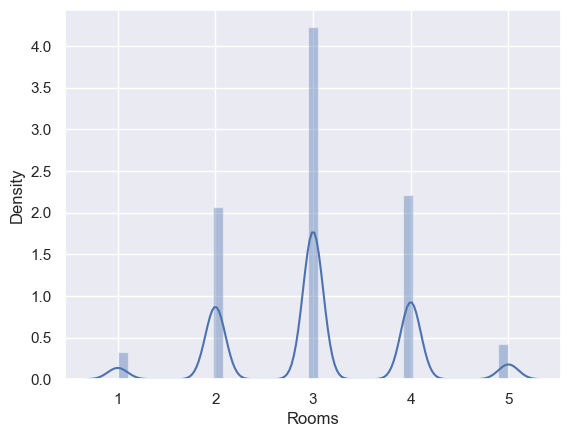

In [14]:
sns.distplot(data_2["Rooms"])

In [15]:
data_cleaned = data_2.reset_index(drop = "True")
data_cleaned.describe(include = "all")

,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
count,47616,47616.000,47616,47616.000,47616,47616,47616.000,47616,47616.000,47616.000,47616
unique,370,NaN,3,NaN,5,419,NaN,8,NaN,NaN,34
top,Reservoir,NaN,h,NaN,S,Barry,NaN,Northern Metropolitan,NaN,NaN,Darebin City Council
freq,1067,NaN,33356,NaN,30181,4779,NaN,13515,NaN,NaN,3454
mean,NaN,3.036,NaN,962729.298,NaN,NaN,3123.079,NaN,7570.232,12.746,NaN
std,NaN,0.886,NaN,494628.753,NaN,NaN,126.142,NaN,4472.748,7.558,NaN
min,NaN,1.000,NaN,85000.000,NaN,NaN,3000.000,NaN,39.000,0.000,NaN
25%,NaN,2.000,NaN,615000.000,NaN,NaN,3051.000,NaN,4258.000,7.000,NaN
50%,NaN,3.000,NaN,825000.000,NaN,NaN,3102.000,NaN,6567.000,11.700,NaN
75%,NaN,4.000,NaN,1200000.000,NaN,NaN,3163.000,NaN,10412.000,16.700,NaN


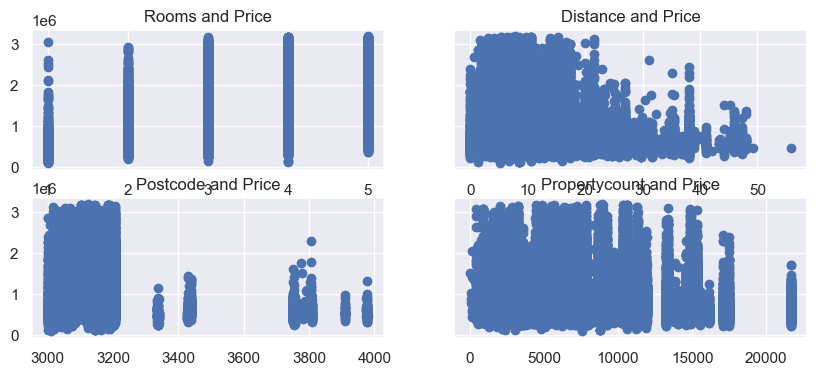

In [16]:
f , ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2 ,sharey = True, figsize = (10, 4))
ax1.scatter(data_cleaned["Rooms"], data_cleaned["Price"])
ax2.scatter(data_cleaned["Distance"], data_cleaned["Price"])
ax3.scatter(data_cleaned["Postcode"], data_cleaned["Price"])
ax4.scatter(data_cleaned["Propertycount"], data_cleaned["Price"])
ax1.set_title("Rooms and Price")
ax2.set_title("Distance and Price")
ax3.set_title("Postcode and Price")
ax4.set_title("Propertycount and Price")
plt.show()

In [17]:
# log transformation of price 
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned

,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,log_price
0,Abbotsford,3,h,1490000.000,S,Jellis,3067,Northern Metropolitan,4019,3.000,Yarra City Council,14.214
1,Abbotsford,3,h,1220000.000,S,Marshall,3067,Northern Metropolitan,4019,3.000,Yarra City Council,14.014
2,Abbotsford,3,h,1420000.000,S,Nelson,3067,Northern Metropolitan,4019,3.000,Yarra City Council,14.166
3,Aberfeldie,3,h,1515000.000,S,Barry,3040,Western Metropolitan,1543,7.500,Moonee Valley City Council,14.231
4,Airport West,2,h,670000.000,S,Nelson,3042,Western Metropolitan,3464,10.400,Moonee Valley City Council,13.415
...,...,...,...,...,...,...,...,...,...,...,...,...
47611,Frankston,2,u,347700.000,SP,Aquire,3199,South-Eastern Metropolitan,17055,38.000,Frankston City Council,12.759
47612,Preston,3,h,808000.000,S,RW,3072,Northern Metropolitan,14577,8.400,Darebin City Council,13.602
47613,Roxburgh Park,3,h,566000.000,S,Raine,3064,Northern Metropolitan,5833,20.600,Hume City Council,13.246
47614,Roxburgh Park,3,h,500000.000,S,Raine,3064,Northern Metropolitan,5833,20.600,Hume City Council,13.122


In [18]:
data_cleaned1 = data_cleaned.drop(["Price"], axis = 1)
data_cleaned1

,Suburb,Rooms,Type,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,log_price
0,Abbotsford,3,h,S,Jellis,3067,Northern Metropolitan,4019,3.000,Yarra City Council,14.214
1,Abbotsford,3,h,S,Marshall,3067,Northern Metropolitan,4019,3.000,Yarra City Council,14.014
2,Abbotsford,3,h,S,Nelson,3067,Northern Metropolitan,4019,3.000,Yarra City Council,14.166
3,Aberfeldie,3,h,S,Barry,3040,Western Metropolitan,1543,7.500,Moonee Valley City Council,14.231
4,Airport West,2,h,S,Nelson,3042,Western Metropolitan,3464,10.400,Moonee Valley City Council,13.415
...,...,...,...,...,...,...,...,...,...,...,...
47611,Frankston,2,u,SP,Aquire,3199,South-Eastern Metropolitan,17055,38.000,Frankston City Council,12.759
47612,Preston,3,h,S,RW,3072,Northern Metropolitan,14577,8.400,Darebin City Council,13.602
47613,Roxburgh Park,3,h,S,Raine,3064,Northern Metropolitan,5833,20.600,Hume City Council,13.246
47614,Roxburgh Park,3,h,S,Raine,3064,Northern Metropolitan,5833,20.600,Hume City Council,13.122


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned1[["Rooms", "Distance", "Postcode", "Propertycount"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values.astype(int), i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,13.694,Rooms
1,4.160,Distance
2,0.049,Postcode
3,0.001,Propertycount


In [20]:
data_preprossed = pd.get_dummies(data_cleaned1, drop_first = True)
data_preprossed

,Rooms,Postcode,Propertycount,Distance,log_price,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,...,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,3067,4019,3.000,14.214,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3,3067,4019,3.000,14.014,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,3067,4019,3.000,14.166,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,3040,1543,7.500,14.231,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,3042,3464,10.400,13.415,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47611,2,3199,17055,38.000,12.759,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47612,3,3072,14577,8.400,13.602,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47613,3,3064,5833,20.600,13.246,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47614,3,3064,5833,20.600,13.122,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
targets = data_preprossed["log_price"]
inputs = data_preprossed.drop("log_price", axis = 1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 42)

In [24]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
reg.intercept_

3468956221.6762753

In [26]:
reg.coef_

array([ 1.86050081e-01,  8.92924811e+10, -1.61689450e+11,  2.14264025e+11,
        2.71774714e+10,  3.90642678e+10, -3.17090492e+09,  1.35611378e+10,
       -1.92146094e+09, -1.30633658e+10,  3.76904867e+10,  2.38391467e+10,
        4.32725951e+10, -6.21038382e+09,  4.10465597e+10,  7.15997680e+10,
       -5.43188960e+10,  2.74809036e+10,  1.18207127e+10,  7.84458682e+09,
        1.08013354e+09,  4.24750100e+10, -2.94726400e+10,  7.17140327e+09,
       -5.86819530e+10, -6.79944936e+10, -4.01056849e+10, -1.40577638e+10,
        2.92901543e+10,  1.86001435e+10, -1.00273965e+11,  1.10094740e+10,
        1.08277395e+10,  1.08424837e+10,  3.84918033e+09, -1.95136673e+10,
       -1.31994580e+10,  4.13432510e+09, -7.37273646e+10,  3.41548667e+09,
       -2.85337950e+09,  1.07818858e+08,  3.83981768e+09, -3.70171229e+10,
       -6.73628000e+09,  3.97400394e+09, -2.48069610e+10, -2.08626527e+09,
       -8.88498011e+10, -1.00526460e+11,  1.51495339e+10, -8.99944025e+09,
        1.07508198e+09, -

In [27]:
# P_values 
from sklearn.feature_selection import f_regression
f_regression(x_train, y_train)
p_values = f_regression(x_train, y_train)[1]
p_values.round(3)

array([0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.94 , 0.   , 0.017, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.991, 0.045, 0.154, 0.   , 0.   , 0.   , 0.   , 0.004,
       0.01 , 0.111, 0.52 , 0.   , 0.253, 0.603, 0.179, 0.298, 0.   ,
       0.   , 0.039, 0.   , 0.   , 0.   , 0.   , 0.895, 0.001, 0.774,
       0.   , 0.   , 0.196, 0.   , 0.   , 0.   , 0.023, 0.   , 0.03 ,
       0.106, 0.   , 0.374, 0.   , 0.619, 0.   , 0.183, 0.087, 0.002,
       0.   , 0.   , 0.025, 0.   , 0.   , 0.   , 0.021, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.817, 0.132, 0.58 , 0.024, 0.   , 0.07 ,
       0.057, 0.036, 0.002, 1.   , 0.117, 0.32 , 0.026, 0.031, 0.   ,
       0.293, 0.74 , 0.089, 0.103, 1.   , 0.827, 0.   , 0.   , 0.002,
       0.014, 0.009, 0.356, 0.002, 0.018, 0.001, 0.827, 0.354, 0.316,
       0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.008, 0.002,
       0.001, 0.62 , 0.112, 0.159, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.737,

In [28]:
# Summary table
reg_summary = pd.DataFrame(inputs.columns.values, columns = ["Features"])
reg_summary["Coefficient"] = reg.coef_
reg_summary["P_values"] = p_values.round(3)
reg_summary

,Features,Coefficient,P_values
0,Rooms,0.186,0.000
1,Postcode,89292481095.427,0.002
2,Propertycount,-161689449582.884,0.000
3,Distance,214264025319.138,0.000
4,Suburb_Aberfeldie,27177471400.833,0.000
...,...,...,...
832,CouncilArea_Whitehorse City Council,15915349950.653,0.000
833,CouncilArea_Whittlesea City Council,-174772119737.563,0.000
834,CouncilArea_Wyndham City Council,15972010729.944,0.000
835,CouncilArea_Yarra City Council,65640451955.860,0.000


In [29]:
# R squared 
reg.score(x_train, y_train)

0.7721592392210832

In [30]:
# Adjusted R Squared 
def Adjr2(x, y):
    r2 = reg.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjr2

Adjr2(x_train, y_train)

0.767040252890167

In [31]:
# let check the output of model
y_hat = reg.predict(x_train)

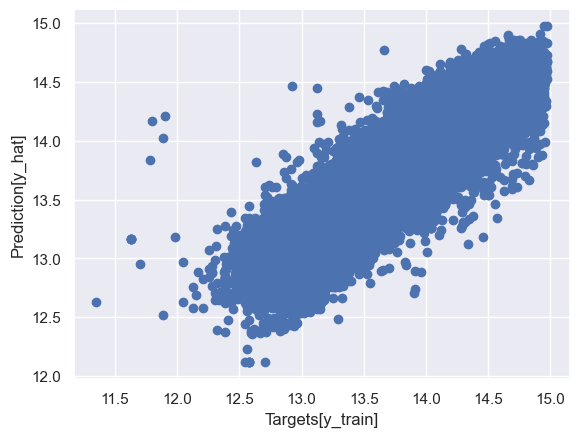

In [32]:
# let plot them
plt.scatter(y_train, y_hat)
plt.xlabel("Targets[y_train]")
plt.ylabel("Prediction[y_hat]")
plt.show()

Text(0.5, 1.0, 'Risduals PDFs')

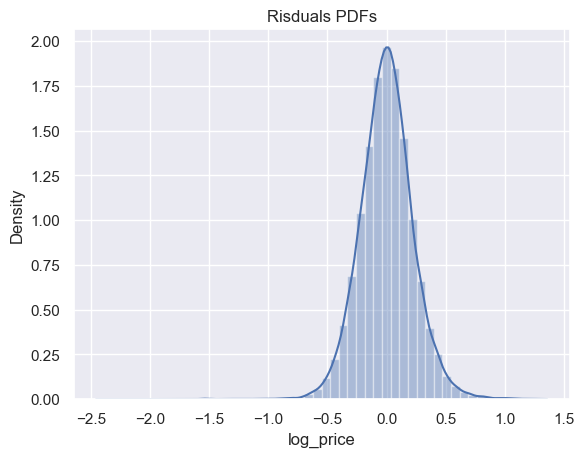

In [33]:
# risduals 
sns.distplot(y_train - y_hat)
plt.title('Risduals PDFs')

In [34]:
y_hat_test = reg.predict(x_test)

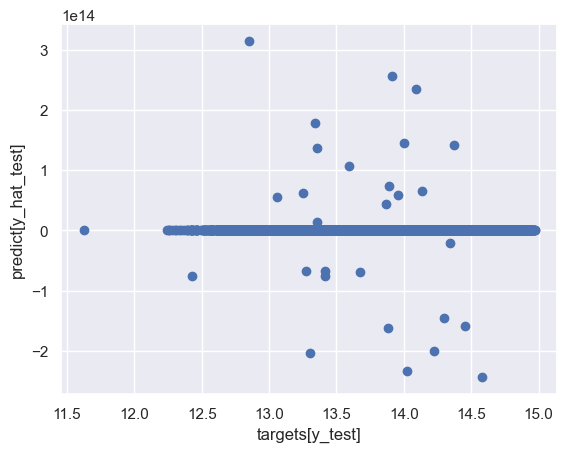

In [35]:
# let plot them
plt.scatter(y_test, y_hat_test)
plt.xlabel("targets[y_test]")
plt.ylabel("predict[y_hat_test]")
plt.show()

In [36]:
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ["Prediction"])
df_pf

,Prediction
0,629183.719
1,1089041.309
2,1473672.365
3,2326811.385
4,787344.947
...,...
9519,878869.613
9520,813386.036
9521,868087.218
9522,615584.799


In [37]:
y_test = y_test.reset_index(drop = True)
df_pf["Targets"] = np.exp(y_test)
df_pf

,Prediction,Targets
0,629183.719,640000.000
1,1089041.309,965000.000
2,1473672.365,1670000.000
3,2326811.385,2300000.000
4,787344.947,755000.000
...,...,...
9519,878869.613,642000.000
9520,813386.036,830000.000
9521,868087.218,1026000.000
9522,615584.799,623000.000


In [38]:
df_pf["Residuals"] = df_pf["Targets"] - df_pf["Prediction"]
df_pf["Difference %"] = np.absolute(df_pf["Residuals"]/df_pf["Targets"] * 100)
df_pf

,Prediction,Targets,Residuals,Difference %
0,629183.719,640000.000,10816.281,1.690
1,1089041.309,965000.000,-124041.309,12.854
2,1473672.365,1670000.000,196327.635,11.756
3,2326811.385,2300000.000,-26811.385,1.166
4,787344.947,755000.000,-32344.947,4.284
...,...,...,...,...
9519,878869.613,642000.000,-236869.613,36.896
9520,813386.036,830000.000,16613.964,2.002
9521,868087.218,1026000.000,157912.782,15.391
9522,615584.799,623000.000,7415.201,1.190


In [39]:
df_pf.sort_values(by= ["Difference %"])

,Prediction,Targets,Residuals,Difference %
327,749984.063,750000.000,15.937,0.002
7211,849972.966,850000.000,27.034,0.003
5090,615960.637,616000.000,39.363,0.006
5326,1214894.835,1215000.000,105.165,0.009
262,742604.990,742500.000,-104.990,0.014
...,...,...,...,...
4317,inf,620000.000,-inf,inf
4207,inf,1050000.000,-inf,inf
4119,inf,800000.000,-inf,inf
1297,inf,630000.000,-inf,inf


In [40]:
df_pf.describe(include = "all")

,Prediction,Targets,Residuals,Difference %
count,9524.000,9524.000,9524.000,9524.000
mean,inf,958735.599,-inf,inf
std,NaN,493865.412,NaN,NaN
min,0.000,112000.000,-inf,0.002
25%,626616.017,612500.000,-115516.985,6.861
50%,837299.867,820000.000,-3201.019,14.601
75%,1158610.865,1200000.000,119314.068,25.670
max,inf,3180000.000,2566980.442,inf


In [41]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [42]:
# let check the output of model
y_hat = regressor.predict(x_train)

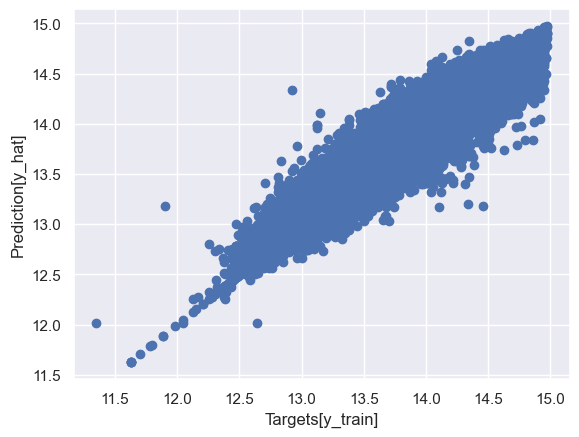

In [43]:
# let plot them
plt.scatter(y_train, y_hat)
plt.xlabel("Targets[y_train]")
plt.ylabel("Prediction[y_hat]")
plt.show()

Text(0.5, 1.0, 'Risduals PDFs')

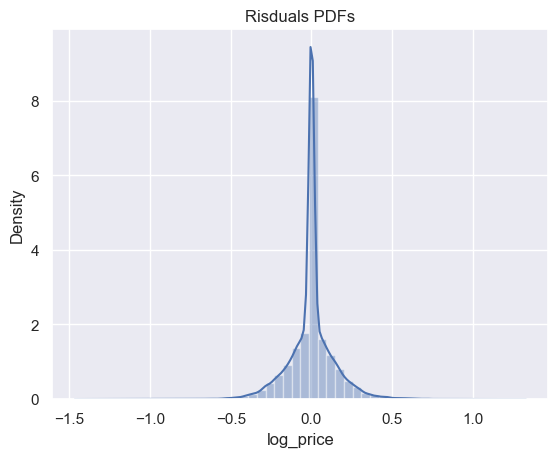

In [44]:
sns.distplot(y_train - y_hat)
plt.title('Risduals PDFs')

In [45]:
# R square
regressor.score(x_train, y_train)

0.9166163039227937

In [46]:
# Adjusted R squared 
def AdjR2(x, y):
    r2 = regressor.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjr2
AdjR2(x_train, y_train)

0.9147428902325424

In [47]:
y_hat_test = regressor.predict(x_test)

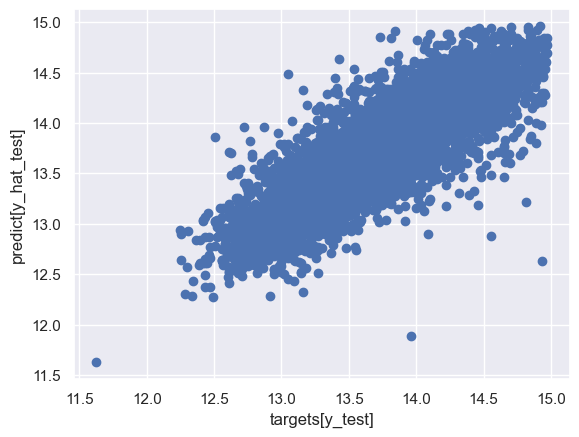

In [48]:
# let plot them
plt.scatter(y_test, y_hat_test)
plt.xlabel("targets[y_test]")
plt.ylabel("predict[y_hat_test]")
plt.show()

In [49]:
df_pf1 = pd.DataFrame(np.exp(y_hat_test) , columns = ["Prediction"])
df_pf1

,Prediction
0,765000.000
1,934015.808
2,1229837.388
3,2314808.091
4,630000.000
...,...
9519,835500.000
9520,795015.695
9521,1116000.000
9522,538036.963


In [50]:
y_test = y_test.reset_index(drop = True)
df_pf1["Targets"] = np.exp(y_test)
df_pf1

,Prediction,Targets
0,765000.000,640000.000
1,934015.808,965000.000
2,1229837.388,1670000.000
3,2314808.091,2300000.000
4,630000.000,755000.000
...,...,...
9519,835500.000,642000.000
9520,795015.695,830000.000
9521,1116000.000,1026000.000
9522,538036.963,623000.000


In [51]:
df_pf1["Residuals"] = df_pf1["Targets"] - df_pf1["Prediction"]
df_pf1["Difference %"] = np.absolute(df_pf1["Residuals"]/df_pf1["Targets"] * 100)
df_pf1

,Prediction,Targets,Residuals,Difference %
0,765000.000,640000.000,-125000.000,19.531
1,934015.808,965000.000,30984.192,3.211
2,1229837.388,1670000.000,440162.612,26.357
3,2314808.091,2300000.000,-14808.091,0.644
4,630000.000,755000.000,125000.000,16.556
...,...,...,...,...
9519,835500.000,642000.000,-193500.000,30.140
9520,795015.695,830000.000,34984.305,4.215
9521,1116000.000,1026000.000,-90000.000,8.772
9522,538036.963,623000.000,84963.037,13.638


In [133]:
df_pf1.sort_values(by= ["Difference %"])

,Prediction,Targets,Residuals,Difference %
1321,770000.000,770000.000,0.000,0.000
5391,1000000.000,1000000.000,0.000,0.000
3155,760000.000,760000.000,0.000,0.000
3183,1125000.000,1125000.000,0.000,0.000
3190,490000.000,490000.000,0.000,0.000
...,...,...,...,...
8393,1670000.000,520000.000,-1150000.000,221.154
5575,2270000.000,680000.000,-1590000.000,233.824
5147,1152000.000,335000.000,-817000.000,243.881
259,1050000.000,270000.000,-780000.000,288.889


In [53]:
df_pf1.describe(include = "all")

,Prediction,Targets,Residuals,Difference %
count,9524.000,9524.000,9524.000,9524.000
mean,953885.848,958735.599,4849.751,18.889
std,461489.564,493865.412,285599.448,19.740
min,112000.000,112000.000,-1975000.000,0.000
25%,625000.000,612500.000,-118670.258,5.974
50%,825071.361,820000.000,-798.865,13.843
75%,1181004.201,1200000.000,107003.227,25.727
max,3142276.245,3180000.000,2745000.000,319.355
